<a href="https://colab.research.google.com/github/Chinmaya54/DM_Challenge_WC_Winner/blob/main/Final_ICC_WC23_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2.1 and Task 3: Predicting the Finalist Teams and Winner** \

You are required to predict the two finalist teams in the ICC Cricket World Cup 2023

**Importing required packages**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **DATASET DESCRIPTION**



**1.   ICC CWC 23 Points Table (Scrapped)**\
Dataset Link : [link ipynb](https://colab.research.google.com/drive/1wlpc9ZyKRxSxSK4ZTn4BByl2ybIugbhP)\
Description :
- **source:** The dataset was collected through web scraping from Cricbuzz, a prominent sports platform. It contains cricket performance details for various countries, including the number of matches played, matches won and lost, points earned, and net run rate. The use of web scraping allows for a comprehensive and up-to-date overview of cricket statistics, providing valuable insights into the performances of different teams in specific matches.
- **Purpose:** Comprehensive overview of cricket performances by different nations.
- **Columns:**
  - countries: Abbreviations of cricket-playing nations.
  - matches_played: Total matches played by each country.
  - matches_won: Matches won by each country.
  - matches_lost: Matches lost by each country.
  - points: Total points earned by each country.
  - net_run_rate: Statistical measure reflecting team performance, calculated as the difference between average runs scored and average runs conceded per over.

**2.   ODI Men's Cricket Match Data (2002-2023)**   
Dataset Link : [link kaggle](https://www.kaggle.com/datasets/utkarshtomar736/odi-mens-cricket-match-data-2002-2023)\
Description :
This dataset provides comprehensive information about ODI cricket matches, making it suitable for analysis and research in the field of cricket statistics and performance evaluation.
- **id:** A unique identifier for each cricket match.

- **season:** The season or year in which the match took place.

- **city:** The city where the match was held.

- **date:** The date on which the match was played.

- **team1:** The name of the first cricket team participating in the match.

- **team2:** The name of the second cricket team participating in the match.

- **toss_winner:** The team that won the toss.

- **toss_decision:** The decision made by the toss-winning team (bat or field).

- **result:** The result of the match (e.g., "normal," "tie," "no result").

- **dl_applied:** An indicator of whether the Duckworth-Lewis method was applied (1 for applied, 0 for not applied).

- **winner:**The winning team of the match.

- **win_by_runs:**The margin of victory in runs (0 for wickets, if not applicable).

- **win_by_wickets:**The margin of victory in wickets (0 for runs, if not applicable).

- **player_of_match:**The player awarded the "Man of the Match" title.

- **venue:**The stadium or venue where the match was played.

- **umpire1:**The name of the first on-field umpire.

- **umpire2:**The name of the second on-field umpire.

- **umpire3:**The name of the third umpire (TV umpire).

### Extracting the Semifinalists for ICC CWC23

In [3]:
pt_df = pd.read_csv('/content/points_table_scrapped.csv')

In [4]:
pt_df

,Unnamed: 0,countries,matches_played,matches_won,matches_lost,points,net_run_rate
0,0,IND,9,9,0,18,2.570
1,1,RSA,9,7,2,14,1.261
2,2,AUS,9,7,2,14,0.841
3,3,NZ,9,5,4,10,0.743
4,4,PAK,9,4,5,8,-0.199
5,5,AFG,9,4,5,8,-0.336
6,6,ENG,9,3,6,6,-0.572
7,7,BAN,9,2,7,4,-1.087
8,8,SL,9,2,7,4,-1.419
9,9,NED,9,2,7,4,-1.825


In [5]:
# Rename the 'Unnamed: 0' column to 'position' and start values from 1
pt_df.rename(columns={'Unnamed: 0': 'position'}, inplace=True)
pt_df['position'] = pt_df['position'] + 1
pt_df

,position,countries,matches_played,matches_won,matches_lost,points,net_run_rate
0,1,IND,9,9,0,18,2.570
1,2,RSA,9,7,2,14,1.261
2,3,AUS,9,7,2,14,0.841
3,4,NZ,9,5,4,10,0.743
4,5,PAK,9,4,5,8,-0.199
5,6,AFG,9,4,5,8,-0.336
6,7,ENG,9,3,6,6,-0.572
7,8,BAN,9,2,7,4,-1.087
8,9,SL,9,2,7,4,-1.419
9,10,NED,9,2,7,4,-1.825


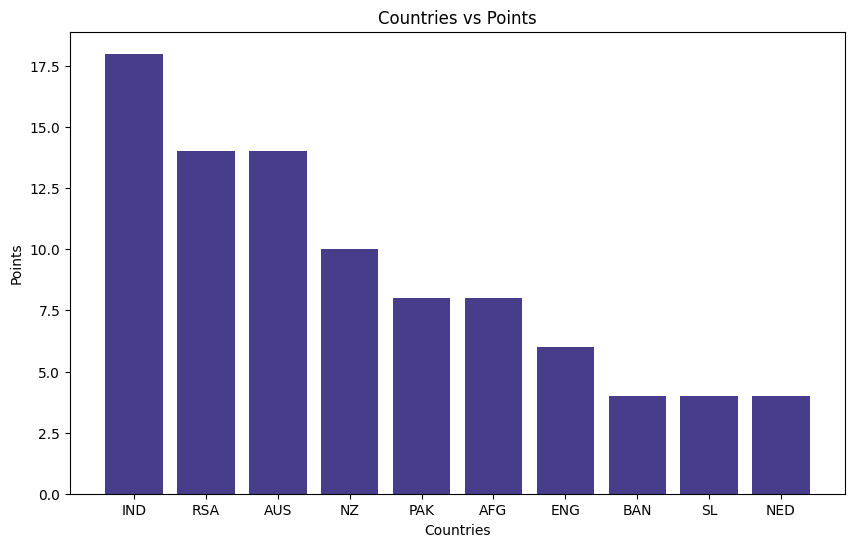

In [6]:
# Bargraph for contries and their match points
plt.figure(figsize=(10, 6))
plt.bar(pt_df['countries'], pt_df['points'], color='darkslateblue')
plt.xlabel('Countries')
plt.ylabel('Points')
plt.title('Countries vs Points')
plt.show()


In [7]:
# Extracting semifinalists for ICC CWC23
top4_countries_df = pt_df[pt_df['position'].isin([1, 2, 3, 4])]
semifinalist_teams = top4_countries_df['countries'].tolist()

# the semifinalist teams
print("Semifinalist Teams:")
print(semifinalist_teams)

Semifinalist Teams:
['IND', 'RSA', 'AUS', 'NZ']


In [8]:
# Mapping to country's full name
abb_mapping = {'IND': 'India', 'RSA': 'South Africa', 'AUS': 'Australia', 'NZ': 'New Zealand'}
semifinalist_teams = [abb_mapping.get(team, team) for team in semifinalist_teams]

# Display the semifinalist teams with full names
print("Semifinalist Teams with Full Names:")
print(semifinalist_teams)

Semifinalist Teams with Full Names:
['India', 'South Africa', 'Australia', 'New Zealand']


## **Historic Match DATA for Semifinalists**

In [9]:
match_df = pd.read_csv('/content/drive/MyDrive/Assignment Datasets /ODI_Match_info.csv')

In [10]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [11]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus


In [12]:
match_df.dtypes

id                  int64
season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [13]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2379 non-null   int64 
 1   season           2379 non-null   object
 2   city             2069 non-null   object
 3   date             2379 non-null   object
 4   team1            2379 non-null   object
 5   team2            2379 non-null   object
 6   toss_winner      2379 non-null   object
 7   toss_decision    2379 non-null   object
 8   result           2379 non-null   object
 9   dl_applied       2379 non-null   int64 
 10  winner           2259 non-null   object
 11  win_by_runs      2379 non-null   int64 
 12  win_by_wickets   2379 non-null   int64 
 13  player_of_match  2228 non-null   object
 14  venue            2379 non-null   object
 15  umpire1          2379 non-null   object
 16  umpire2          2379 non-null   object
 17  umpire3          2097 non-null   

**Null values are present**\
Need Imputation or dropping columns having a higher percentage of missing values.

### Preprocessing

In [14]:
# Checking null value percentage
percent_missing = match_df.isnull().sum() * 100 / len(match_df)
missing_value_df = pd.DataFrame({'missing_percentage': percent_missing, 'type': match_df.dtypes})
missing_value_df.sort_values('missing_percentage',ascending=False, inplace=True)
missing_value_df.head(20)

,missing_percentage,type
city,13.030685,object
umpire3,11.853720,object
player_of_match,6.347205,object
winner,5.044136,object
umpire2,0.000000,object
umpire1,0.000000,object
venue,0.000000,object
win_by_wickets,0.000000,int64
win_by_runs,0.000000,int64
id,0.000000,int64


In [15]:
match_df.isnull().sum()

id                   0
season               0
city               310
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner             120
win_by_runs          0
win_by_wickets       0
player_of_match    151
venue                0
umpire1              0
umpire2              0
umpire3            282
dtype: int64

In [16]:
# Dropping rows where null values are present in winner column because it will be our target column
match_df.dropna(subset=['winner'], inplace=True)

In [17]:
#filling na values by 0
match_df[["city", "player_of_match", "umpire3"]] = match_df[["city", "player_of_match", "umpire3"]].fillna(0)

In [18]:
match_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [19]:
match_df.dtypes

id                  int64
season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

Need to **ENCODE and Transform columns** to used them as predictors

In [20]:
# Changing date to proper date format
match_df['date'] = pd.to_datetime(match_df['date'])

In [21]:
# Extract rows where 'team1' or 'team2' is a semifinalist
semifinalist_matches_df = match_df[match_df['team1'].isin(semifinalist_teams) | match_df['team2'].isin(semifinalist_teams)]

# Display the new DataFrame
semifinalist_matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023-09-24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
2,1395701,2023,Dhaka,2023-09-23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023-09-22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
5,1388414,2023,Colombo,2023-09-17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0,10,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney
6,1373575,2023/24,Johannesburg,2023-09-17,South Africa,Australia,Australia,field,normal,0,South Africa,122,0,M Jansen,"The Wanderers Stadium, Johannesburg",A Paleker,RA Kettleborough,Nitin Menon


In [22]:
match_df.shape

(2259, 18)

In [23]:
semifinalist_matches_df.shape

(1262, 18)

In [24]:
semifinalist_matches_df['team1'].unique()

array(['India', 'New Zealand', 'Australia', 'Sri Lanka', 'South Africa',
       'Bangladesh', 'England', 'Nepal', 'West Indies', 'Pakistan',
       'Netherlands', 'Zimbabwe', 'Scotland', 'Ireland', 'Afghanistan',
       'Canada', 'Kenya', 'Hong Kong', 'Bermuda',
       'United States of America'], dtype=object)

In [25]:
semifinalist_matches_df['team2'].unique()

array(['Australia', 'Bangladesh', 'India', 'New Zealand', 'Sri Lanka',
       'Pakistan', 'South Africa', 'West Indies', 'Netherlands',
       'England', 'Zimbabwe', 'Ireland', 'Hong Kong', 'Scotland',
       'United Arab Emirates', 'Afghanistan', 'Canada', 'Kenya',
       'ICC World XI', 'United States of America', 'Namibia'],
      dtype=object)

In [26]:
# Getting names of all the teams present in dataset
unique_teams = set(semifinalist_matches_df['team1'].unique()) | set(semifinalist_matches_df['team2'].unique())

# Convert the set to a list
unique_teams = list(unique_teams)

# Display the list of unique teams
print("List of Unique Teams:")
print(unique_teams)
print(f'\nThere are {len(unique_teams)} Teams in total.')

List of Unique Teams:
['Pakistan', 'West Indies', 'Scotland', 'Afghanistan', 'Nepal', 'United Arab Emirates', 'Australia', 'Kenya', 'Zimbabwe', 'New Zealand', 'Netherlands', 'South Africa', 'Bangladesh', 'Namibia', 'Hong Kong', 'Ireland', 'Canada', 'India', 'ICC World XI', 'United States of America', 'Bermuda', 'Sri Lanka', 'England']

There are 23 Teams in total.


In [27]:
# Encoding Features
label_encoder = LabelEncoder()
# Fit and transform the LabelEncoder on all unique teams
label_encoder.fit(unique_teams)
semifinalist_matches_df['team1_encoded'] = label_encoder.transform(semifinalist_matches_df['team1'])
semifinalist_matches_df['team2_encoded'] = label_encoder.transform(semifinalist_matches_df['team2'])
semifinalist_matches_df['toss_winner_encoded'] = label_encoder.transform(semifinalist_matches_df['toss_winner'])
semifinalist_matches_df['winner_encoded'] = label_encoder.transform(semifinalist_matches_df['winner'])
# Display the updated DataFrame
semifinalist_matches_df.head()

<ipython-input-27-09de0473d402>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['team1_encoded'] = label_encoder.transform(semifinalist_matches_df['team1'])
<ipython-input-27-09de0473d402>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['team2_encoded'] = label_encoder.transform(semifinalist_matches_df['team2'])
<ipython-input-27-09de0473d402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_encoded,team2_encoded,toss_winner_encoded,winner_encoded
0,1389389,2023/24,Indore,2023-09-24,India,Australia,Australia,field,D/L,1,...,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan,8,1,1,8
2,1395701,2023,Dhaka,2023-09-23,New Zealand,Bangladesh,New Zealand,bat,normal,0,...,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon,14,2,14,14
3,1389388,2023/24,Chandigarh,2023-09-22,Australia,India,India,field,normal,0,...,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal,1,8,8,8
5,1388414,2023,Colombo,2023-09-17,Sri Lanka,India,Sri Lanka,bat,normal,0,...,10,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney,18,8,18,8
6,1373575,2023/24,Johannesburg,2023-09-17,South Africa,Australia,Australia,field,normal,0,...,0,M Jansen,"The Wanderers Stadium, Johannesburg",A Paleker,RA Kettleborough,Nitin Menon,17,1,1,17


In [28]:
# Encoding remaining columns
semifinalist_matches_df['toss_decision_encoded'] = label_encoder.fit_transform(semifinalist_matches_df['toss_decision'])
semifinalist_matches_df['venue_encoded'] = label_encoder.fit_transform(semifinalist_matches_df['venue'])

<ipython-input-28-ca2f28b3ecd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['toss_decision_encoded'] = label_encoder.fit_transform(semifinalist_matches_df['toss_decision'])
<ipython-input-28-ca2f28b3ecd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['venue_encoded'] = label_encoder.fit_transform(semifinalist_matches_df['venue'])


In [29]:
semifinalist_matches_df.dtypes

id                                int64
season                           object
city                             object
date                     datetime64[ns]
team1                            object
team2                            object
toss_winner                      object
toss_decision                    object
result                           object
dl_applied                        int64
winner                           object
win_by_runs                       int64
win_by_wickets                    int64
player_of_match                  object
venue                            object
umpire1                          object
umpire2                          object
umpire3                          object
team1_encoded                     int64
team2_encoded                     int64
toss_winner_encoded               int64
winner_encoded                    int64
toss_decision_encoded             int64
venue_encoded                     int64
dtype: object

<ipython-input-30-d7e9819a941f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = semifinalist_matches_df.corr()


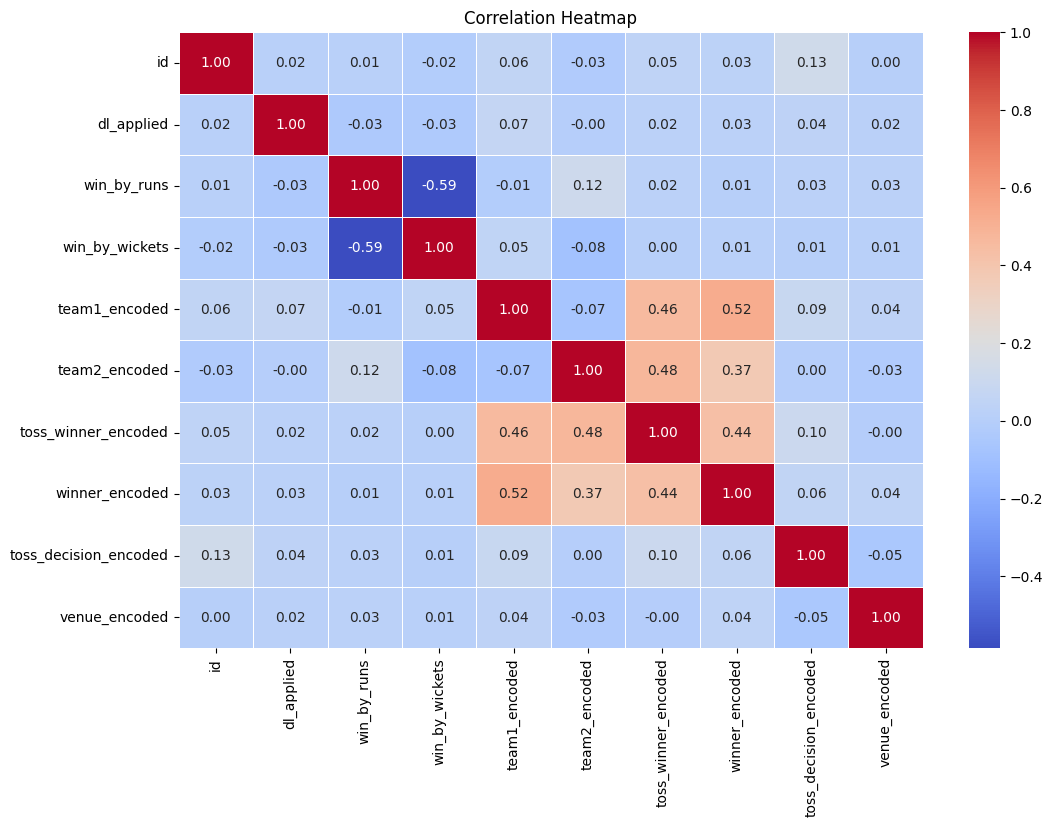

In [30]:
# Feature Selection using Correlation Analysis
# Correlation matrix
correlation_matrix = semifinalist_matches_df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
# Select features and target variable
features = ['team1_encoded', 'team2_encoded', 'venue_encoded','toss_winner_encoded','toss_decision_encoded']
target = 'winner_encoded'

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(semifinalist_matches_df[features],
                                                    semifinalist_matches_df[target], test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1009, 5)
Shape of X_test: (253, 5)
Shape of y_train: (1009,)
Shape of y_test: (253,)


### Training Different Models on Historic data

In [33]:
# Function for evaluating the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on all sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print the classification reports
    print(f"{model}\n")
    print("Training Set Results:")
    print(classification_report(y_train, y_train_pred))
    print("Test Set Results:")
    print(classification_report(y_test, y_test_pred))

    return train_accuracy, test_accuracy

In [34]:
# Create and fit the Logistic Regression model
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)

In [35]:
# Call the function to evaluate the model
train_accuracy_lr, test_accuracy_lr = evaluate_model(logreg_model, X_train, y_train, X_test, y_test)

LogisticRegression(max_iter=5000, multi_class='multinomial')

Training Set Results:
              precision    recall  f1-score   support

           1       0.50      0.76      0.61       214
           2       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        76
           8       0.31      0.49      0.38       232
           9       0.00      0.00      0.00         1
          14       0.06      0.01      0.02       149
          15       0.00      0.00      0.00        51
          17       0.33      0.57      0.42       167
          18       0.00      0.00      0.00        60
          21       0.00      0.00      0.00        35
          22       0.00      0.00      0.00         5

    accuracy                           0.37      1009
   macro avg       0.11      0.17      0.13      1009
weighted avg       0.24      0.37      0.29      1009

Test Set Results:
              precision    recall  f1-score   support

           1       0.51      0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [36]:
# Print the accuracies
print('Logistic Regression\n')
print(f"Training Set Accuracy: {train_accuracy_lr:.4f}")
print(f"Test Set Accuracy: {test_accuracy_lr:.4f}")

Logistic Regression

Training Set Accuracy: 0.3697
Test Set Accuracy: 0.4032


In [37]:
# Create and fit the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [38]:
# Call the function to evaluate the model
train_accuracy_rf, test_accuracy_rf = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

RandomForestClassifier(random_state=42)

Training Set Results:
              precision    recall  f1-score   support

           1       0.91      0.96      0.94       214
           2       0.94      0.89      0.92        19
           5       0.97      0.89      0.93        76
           8       0.95      0.96      0.96       232
           9       1.00      1.00      1.00         1
          14       0.97      0.99      0.98       149
          15       0.91      0.82      0.87        51
          17       0.98      0.98      0.98       167
          18       0.92      0.93      0.93        60
          21       1.00      0.80      0.89        35
          22       1.00      0.80      0.89         5

    accuracy                           0.95      1009
   macro avg       0.96      0.91      0.93      1009
weighted avg       0.95      0.95      0.95      1009

Test Set Results:
              precision    recall  f1-score   support

           1       0.74      0.74      0.74        

In [39]:
# Print the accuracies
print('Random Forest Classifier\n')
print(f"Training Set Accuracy: {train_accuracy_rf:.4f}")
print(f"Test Set Accuracy: {test_accuracy_rf:.4f}")

Random Forest Classifier

Training Set Accuracy: 0.9475
Test Set Accuracy: 0.6364


In [40]:
# Create and fit the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

In [41]:
# Call the function to evaluate the model
train_accuracy_dt, test_accuracy_dt = evaluate_model(dt_model, X_train, y_train, X_test, y_test)

DecisionTreeClassifier(max_depth=10, random_state=42)

Training Set Results:
              precision    recall  f1-score   support

           1       0.88      0.95      0.92       214
           2       0.94      0.84      0.89        19
           5       0.81      0.78      0.79        76
           8       0.84      0.97      0.90       232
           9       1.00      1.00      1.00         1
          14       0.86      0.84      0.85       149
          15       0.84      0.63      0.72        51
          17       0.83      0.92      0.87       167
          18       0.96      0.40      0.56        60
          21       0.91      0.57      0.70        35
          22       1.00      0.60      0.75         5

    accuracy                           0.85      1009
   macro avg       0.90      0.77      0.81      1009
weighted avg       0.86      0.85      0.85      1009

Test Set Results:
              precision    recall  f1-score   support

           1       0.70      0.72    

In [42]:
# Print the accuracies
print('Decision Classifier\n')
print(f"Training Set Accuracy: {train_accuracy_dt:.4f}")
print(f"Test Set Accuracy: {test_accuracy_dt:.4f}")

Decision Classifier

Training Set Accuracy: 0.8543
Test Set Accuracy: 0.6285


In [68]:
# Train an Artificial Neural Network (ANN)
ann_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
ann_model.fit(X_train, y_train)

# Make predictions using the ANN model
ann_predictions = ann_model.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predictions)
print(f'ANN Model Accuracy: {ann_accuracy}')

ANN Model Accuracy: 0.4980237154150198


In [44]:
# Simple ANN model
simple_ann_model = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500)
simple_ann_model.fit(X_train, y_train)
simple_ann_predictions = simple_ann_model.predict(X_test)
simple_ann_accuracy = accuracy_score(y_test, simple_ann_predictions)
print(f'Simple ANN Model Accuracy: {simple_ann_accuracy}')

# Larger ANN model
larger_ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
larger_ann_model.fit(X_train, y_train)
larger_ann_predictions = larger_ann_model.predict(X_test)
larger_ann_accuracy = accuracy_score(y_test, larger_ann_predictions)
print(f'Larger ANN Model Accuracy: {larger_ann_accuracy}')

# Deeper ANN model
deeper_ann_model = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=500)
deeper_ann_model.fit(X_train, y_train)
deeper_ann_predictions = deeper_ann_model.predict(X_test)
deeper_ann_accuracy = accuracy_score(y_test, deeper_ann_predictions)
print(f'Deeper ANN Model Accuracy: {deeper_ann_accuracy}')

Simple ANN Model Accuracy: 0.5335968379446641
Larger ANN Model Accuracy: 0.48221343873517786
Deeper ANN Model Accuracy: 0.5059288537549407


### **Predicting Finalist**

In [69]:
# Create a DataFrame with semifinal fixtures
test_data = pd.DataFrame(columns=['team1', 'team2', 'venue','toss_winner_encoded', 'toss_decision_encoded'])

#first finalist (India vs. New Zealand at Wankhede Stadium, Mumbai)
test_data = test_data.append({'team1': 'India', 'team2': 'New Zealand', 'venue': 'Wankhede Stadium','toss_winner_encoded': 0, 'toss_decision_encoded': 0}, ignore_index=True)

# second finalist (Australia vs. South Africa at Eden Gardens, Kolkata)
test_data = test_data.append({'team1': 'Australia', 'team2': 'South Africa', 'venue': 'Eden Gardens', 'toss_winner_encoded': 0, 'toss_decision_encoded': 0}, ignore_index=True)

# Display the test dataset
test_data

<ipython-input-69-37b2a924d8d8>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append({'team1': 'India', 'team2': 'New Zealand', 'venue': 'Wankhede Stadium','toss_winner_encoded': 0, 'toss_decision_encoded': 0}, ignore_index=True)
<ipython-input-69-37b2a924d8d8>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append({'team1': 'Australia', 'team2': 'South Africa', 'venue': 'Eden Gardens', 'toss_winner_encoded': 0, 'toss_decision_encoded': 0}, ignore_index=True)


,team1,team2,venue,toss_winner_encoded,toss_decision_encoded
0,India,New Zealand,Wankhede Stadium,0,0
1,Australia,South Africa,Eden Gardens,0,0


In [70]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the LabelEncoder on all unique teams
label_encoder.fit(unique_teams)

LabelEncoder()

In [71]:
# Encode 'team1' and 'team2' columns in the DataFrame
test_data['team1_encoded'] = label_encoder.transform(test_data['team1'])
test_data['team2_encoded'] = label_encoder.transform(test_data['team2'])
test_data['venue_encoded'] = label_encoder.fit_transform(test_data['venue'])

In [72]:
test_data

,team1,team2,venue,toss_winner_encoded,toss_decision_encoded,team1_encoded,team2_encoded,venue_encoded
0,India,New Zealand,Wankhede Stadium,0,0,8,14,1
1,Australia,South Africa,Eden Gardens,0,0,1,17,0


In [73]:
# Reverse label encoding for team names
reverse_label_mapping = {0: 'Afghanistan', 1: 'Australia', 2: 'Bangladesh', 3: 'Bermuda', 4: 'Canada',
                         5: 'England', 6: 'Hong Kong', 7: 'ICC World XI', 8: 'India', 9: 'Ireland',
                         10: 'Kenya', 11: 'Namibia', 12: 'Nepal', 13: 'Netherlands', 14: 'New Zealand',
                         15: 'Pakistan', 16: 'Scotland', 17: 'South Africa', 18: 'Sri Lanka',
                         19: 'United Arab Emirates', 20: 'United States of America', 21: 'West Indies',
                         22: 'Zimbabwe'}

# Use the trained models to predict the finalists
logreg_finalists = logreg_model.predict(test_data[features])
rf_finalists = rf_model.predict(test_data[features])
dt_finalists = dt_model.predict(test_data[features])
ann_finalists = ann_model.predict(test_data[features])

# Reverse label encoding for model predictions
logreg_finalists_names = [reverse_label_mapping[label] for label in logreg_finalists]
dt_finalists_names = [reverse_label_mapping[label] for label in dt_finalists]
rf_finalists_names = [reverse_label_mapping[label] for label in rf_finalists]
ann_finalists_names = [reverse_label_mapping[label] for label in ann_finalists]

# Print the predicted finalists
print(f'logreg Predicted Finalists: {logreg_finalists_names}')
print(f'rf Predicted Finalists: {rf_finalists_names}')
print(f'dt Predicted Finalists: {dt_finalists_names}')
print(f'ANN Predicted Finalists: {ann_finalists_names}')

logreg Predicted Finalists: ['India', 'India']
rf Predicted Finalists: ['Australia', 'South Africa']
dt Predicted Finalists: ['New Zealand', 'South Africa']
ANN Predicted Finalists: ['India', 'Australia']


## **TASK-03 : Winner Prediction**

In [74]:
# Create a DataFrame with final match
final_data = pd.DataFrame(columns=['team1', 'team2', 'venue','toss_winner_encoded', 'toss_decision_encoded'])

#first finalist (India vs. New Zealand at Wankhede Stadium, Mumbai)
final_data = final_data.append({'team1': 'India', 'team2': 'Australia', 'venue': 'Narendra Modi Stadium','toss_winner_encoded': 0, 'toss_decision_encoded': 0}, ignore_index=True)

final_data

<ipython-input-74-0aef5ed00ee4>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append({'team1': 'India', 'team2': 'Australia', 'venue': 'Narendra Modi Stadium','toss_winner_encoded': 0, 'toss_decision_encoded': 0}, ignore_index=True)


,team1,team2,venue,toss_winner_encoded,toss_decision_encoded
0,India,Australia,Narendra Modi Stadium,0,0


In [75]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the LabelEncoder on all unique teams
label_encoder.fit(unique_teams)

LabelEncoder()

In [76]:
# Encode 'team1' and 'team2' columns in the DataFrame
final_data['team1_encoded'] = label_encoder.transform(final_data['team1'])
final_data['team2_encoded'] = label_encoder.transform(final_data['team2'])
final_data['venue_encoded'] = label_encoder.fit_transform(final_data['venue'])

In [77]:
final_data

,team1,team2,venue,toss_winner_encoded,toss_decision_encoded,team1_encoded,team2_encoded,venue_encoded
0,India,Australia,Narendra Modi Stadium,0,0,8,1,0


In [78]:
X= semifinalist_matches_df[features]
y= semifinalist_matches_df[target]

In [79]:
# Train an Artificial Neural Network (ANN)
ann_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
ann_model.fit(X, y)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)

In [81]:
# Reverse label encoding for team names
reverse_label_mapping = {0: 'Afghanistan', 1: 'Australia', 2: 'Bangladesh', 3: 'Bermuda', 4: 'Canada',
                         5: 'England', 6: 'Hong Kong', 7: 'ICC World XI', 8: 'India', 9: 'Ireland',
                         10: 'Kenya', 11: 'Namibia', 12: 'Nepal', 13: 'Netherlands', 14: 'New Zealand',
                         15: 'Pakistan', 16: 'Scotland', 17: 'South Africa', 18: 'Sri Lanka',
                         19: 'United Arab Emirates', 20: 'United States of America', 21: 'West Indies',
                         22: 'Zimbabwe'}

# Use the trained models to predict the finalists
ann_finalists = ann_model.predict(final_data[features])

# Reverse label encoding for model predictions
ann_finalists_names = [reverse_label_mapping[label] for label in ann_finalists]

# Print the predicted finalists
print(f'ANN Predicted Finalists: {ann_finalists_names}')

ANN Predicted Finalists: ['Australia']


## **Historic Match DATA for Semifinalists**
Taking 5 categories for teams , 4 for semifinalists and 0 class for the rest teams.

In [82]:
match_df = pd.read_csv('/content/drive/MyDrive/Assignment Datasets /ODI_Match_info.csv')

In [83]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [84]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus


In [85]:
match_df.dtypes

id                  int64
season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [86]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2379 non-null   int64 
 1   season           2379 non-null   object
 2   city             2069 non-null   object
 3   date             2379 non-null   object
 4   team1            2379 non-null   object
 5   team2            2379 non-null   object
 6   toss_winner      2379 non-null   object
 7   toss_decision    2379 non-null   object
 8   result           2379 non-null   object
 9   dl_applied       2379 non-null   int64 
 10  winner           2259 non-null   object
 11  win_by_runs      2379 non-null   int64 
 12  win_by_wickets   2379 non-null   int64 
 13  player_of_match  2228 non-null   object
 14  venue            2379 non-null   object
 15  umpire1          2379 non-null   object
 16  umpire2          2379 non-null   object
 17  umpire3          2097 non-null   

**Null values are present**\
Need Imputation or dropping columns having a higher percentage of missing values.

### Preprocessing

In [87]:
# Checking null value percentage
percent_missing = match_df.isnull().sum() * 100 / len(match_df)
missing_value_df = pd.DataFrame({'missing_percentage': percent_missing, 'type': match_df.dtypes})
missing_value_df.sort_values('missing_percentage',ascending=False, inplace=True)
missing_value_df.head(20)

,missing_percentage,type
city,13.030685,object
umpire3,11.853720,object
player_of_match,6.347205,object
winner,5.044136,object
umpire2,0.000000,object
umpire1,0.000000,object
venue,0.000000,object
win_by_wickets,0.000000,int64
win_by_runs,0.000000,int64
id,0.000000,int64


In [88]:
match_df.isnull().sum()

id                   0
season               0
city               310
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner             120
win_by_runs          0
win_by_wickets       0
player_of_match    151
venue                0
umpire1              0
umpire2              0
umpire3            282
dtype: int64

In [89]:
# Dropping rows where null values are present in winner column because it will be our target column
match_df.dropna(subset=['winner'], inplace=True)

In [90]:
#filling na values by 0
match_df[["city", "player_of_match", "umpire3"]] = match_df[["city", "player_of_match", "umpire3"]].fillna(0)

In [91]:
match_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [92]:
match_df.dtypes

id                  int64
season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

Need to **ENCODE and Transform columns** to used them as predictors

In [93]:
# Changing date to proper date format
match_df['date'] = pd.to_datetime(match_df['date'])

In [94]:
# Extract rows where 'team1' or 'team2' is a semifinalist
semifinalist_matches_df = match_df[match_df['team1'].isin(semifinalist_teams) | match_df['team2'].isin(semifinalist_teams)]

# Display the new DataFrame
semifinalist_matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023-09-24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
2,1395701,2023,Dhaka,2023-09-23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023-09-22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
5,1388414,2023,Colombo,2023-09-17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0,10,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney
6,1373575,2023/24,Johannesburg,2023-09-17,South Africa,Australia,Australia,field,normal,0,South Africa,122,0,M Jansen,"The Wanderers Stadium, Johannesburg",A Paleker,RA Kettleborough,Nitin Menon


In [95]:
match_df.shape

(2259, 18)

In [96]:
semifinalist_matches_df.shape

(1262, 18)

In [97]:
# Create a mapping dictionary
team_encoding_map = {team: i + 1 for i, team in enumerate(semifinalist_teams)}

# Encoding using the mapping
semifinalist_matches_df['team1_encoded'] = semifinalist_matches_df['team1'].map(team_encoding_map).fillna(0).astype(int)
semifinalist_matches_df['team2_encoded'] = semifinalist_matches_df['team2'].map(team_encoding_map).fillna(0).astype(int)
semifinalist_matches_df['toss_winner_encoded'] = semifinalist_matches_df['toss_winner'].map(team_encoding_map).fillna(0).astype(int)
semifinalist_matches_df['winner_encoded'] = semifinalist_matches_df['winner'].map(team_encoding_map).fillna(0).astype(int)

# Display the updated DataFrame
semifinalist_matches_df[['team1', 'team1_encoded', 'team2', 'team2_encoded', 'toss_winner', 'toss_winner_encoded', 'winner', 'winner_encoded']]


<ipython-input-97-59432bd1f719>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['team1_encoded'] = semifinalist_matches_df['team1'].map(team_encoding_map).fillna(0).astype(int)
<ipython-input-97-59432bd1f719>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['team2_encoded'] = semifinalist_matches_df['team2'].map(team_encoding_map).fillna(0).astype(int)
<ipython-input-97-59432bd1f719>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,team1,team1_encoded,team2,team2_encoded,toss_winner,toss_winner_encoded,winner,winner_encoded
0,India,1,Australia,3,Australia,3,India,1
2,New Zealand,4,Bangladesh,0,New Zealand,4,New Zealand,4
3,Australia,3,India,1,India,1,India,1
5,Sri Lanka,0,India,1,Sri Lanka,0,India,1
6,South Africa,2,Australia,3,Australia,3,South Africa,2
...,...,...,...,...,...,...,...,...
2374,Sri Lanka,0,Australia,3,Australia,3,Sri Lanka,0
2375,New Zealand,4,India,1,New Zealand,4,India,1
2376,India,1,New Zealand,4,New Zealand,4,New Zealand,4
2377,India,1,New Zealand,4,India,1,New Zealand,4


In [98]:
# Create a LabelEncoder
label_encoder = LabelEncoder()
# Encode rest columns
semifinalist_matches_df['toss_decision_encoded'] = label_encoder.fit_transform(semifinalist_matches_df['toss_decision'])
semifinalist_matches_df['venue_encoded'] = label_encoder.fit_transform(semifinalist_matches_df['venue'])

<ipython-input-98-538e40d0b3d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['toss_decision_encoded'] = label_encoder.fit_transform(semifinalist_matches_df['toss_decision'])
<ipython-input-98-538e40d0b3d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['venue_encoded'] = label_encoder.fit_transform(semifinalist_matches_df['venue'])


In [99]:
semifinalist_matches_df.dtypes

id                                int64
season                           object
city                             object
date                     datetime64[ns]
team1                            object
team2                            object
toss_winner                      object
toss_decision                    object
result                           object
dl_applied                        int64
winner                           object
win_by_runs                       int64
win_by_wickets                    int64
player_of_match                  object
venue                            object
umpire1                          object
umpire2                          object
umpire3                          object
team1_encoded                     int64
team2_encoded                     int64
toss_winner_encoded               int64
winner_encoded                    int64
toss_decision_encoded             int64
venue_encoded                     int64
dtype: object

<ipython-input-100-d7e9819a941f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = semifinalist_matches_df.corr()


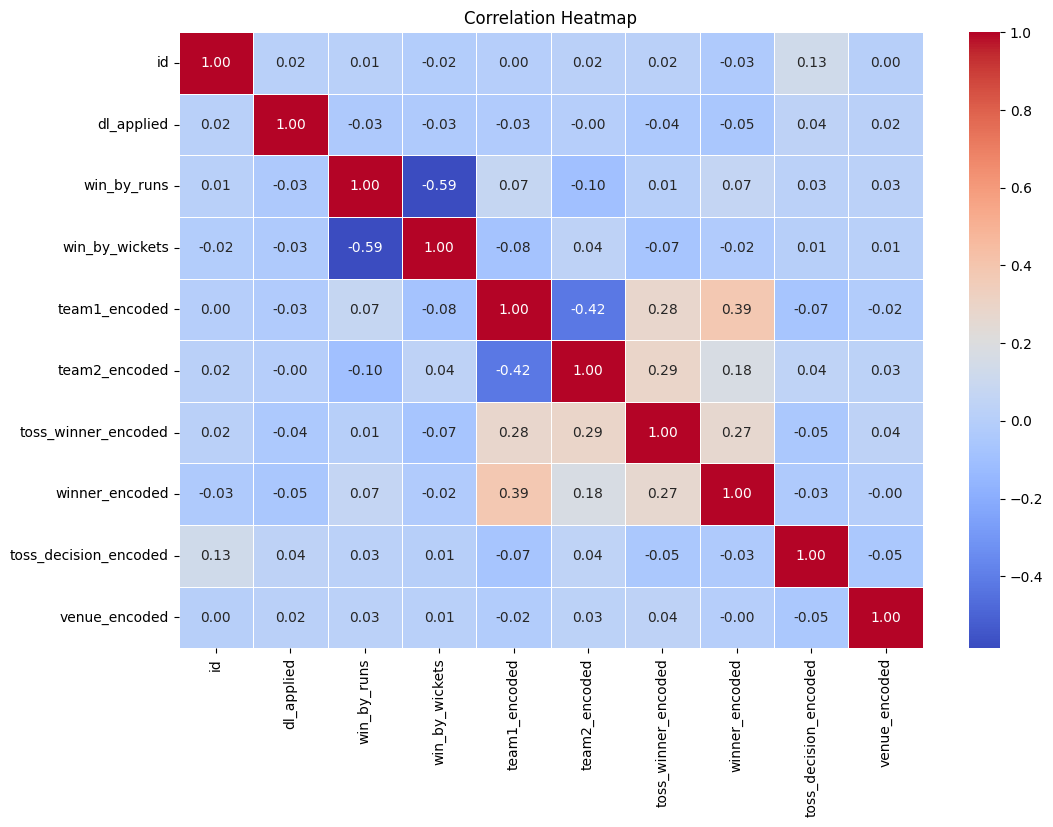

In [100]:
# Feature Selection using Correlation Analysis
# Correlation matrix
correlation_matrix = semifinalist_matches_df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [101]:
# Select features and target variable
features = ['team1_encoded', 'team2_encoded', 'venue_encoded']
target = 'winner_encoded'

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(semifinalist_matches_df[features],
                                                    semifinalist_matches_df[target], test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1009, 3)
Shape of X_test: (253, 3)
Shape of y_train: (1009,)
Shape of y_test: (253,)


In [103]:

# Train a Random Forest Classifier
ml_model = RandomForestClassifier()
ml_model.fit(X_train, y_train)

# Make predictions using the ML model
ml_predictions = ml_model.predict(X_test)
ml_accuracy = accuracy_score(y_test, ml_predictions)
print(f'ML Model Accuracy: {ml_accuracy}')

# # Normalize the features for the ANN model
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train an Artificial Neural Network (ANN)
ann_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
ann_model.fit(X_train, y_train)

# Make predictions using the ANN model
ann_predictions = ann_model.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predictions)
print(f'ANN Model Accuracy: {ann_accuracy}')


ML Model Accuracy: 0.6007905138339921
ANN Model Accuracy: 0.2964426877470356


### Training Different Models on Historic data

In [134]:
# Function for evaluating the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on all sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print the classification reports
    print(f"{model}\n")
    print("Training Set Results:")
    print(classification_report(y_train, y_train_pred))
    print("Test Set Results:")
    print(classification_report(y_test, y_test_pred))

    return train_accuracy, test_accuracy

In [135]:
# Create and fit the Logistic Regression model
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)

In [136]:
# Call the function to evaluate the model
train_accuracy_lr, test_accuracy_lr = evaluate_model(logreg_model, X_train, y_train, X_test, y_test)

LogisticRegression(max_iter=5000, multi_class='multinomial')

Training Set Results:
              precision    recall  f1-score   support

           0       0.27      0.25      0.26       247
           1       0.57      0.75      0.65       232
           2       0.00      0.00      0.00       167
           3       0.33      0.63      0.44       214
           4       0.38      0.20      0.26       149

    accuracy                           0.39      1009
   macro avg       0.31      0.36      0.32      1009
weighted avg       0.32      0.39      0.34      1009

Test Set Results:
              precision    recall  f1-score   support

           0       0.19      0.19      0.19        54
           1       0.55      0.71      0.62        58
           2       0.00      0.00      0.00        45
           3       0.36      0.62      0.46        61
           4       0.29      0.17      0.21        35

    accuracy                           0.38       253
   macro avg       0.28      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [137]:
# Print the accuracies
print('Logistic Regression\n')
print(f"Training Set Accuracy: {train_accuracy_lr:.4f}")
print(f"Test Set Accuracy: {test_accuracy_lr:.4f}")

Logistic Regression

Training Set Accuracy: 0.3944
Test Set Accuracy: 0.3755


In [138]:
# Create and fit the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [139]:
# Call the function to evaluate the model
train_accuracy_rf, test_accuracy_rf = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

RandomForestClassifier(random_state=42)

Training Set Results:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       247
           1       0.83      0.93      0.88       232
           2       0.92      0.86      0.89       167
           3       0.84      0.93      0.88       214
           4       0.87      0.93      0.90       149

    accuracy                           0.85      1009
   macro avg       0.85      0.86      0.85      1009
weighted avg       0.85      0.85      0.84      1009

Test Set Results:
              precision    recall  f1-score   support

           0       0.36      0.33      0.35        54
           1       0.69      0.72      0.71        58
           2       0.71      0.56      0.63        45
           3       0.70      0.77      0.73        61
           4       0.65      0.74      0.69        35

    accuracy                           0.62       253
   macro avg       0.62      0.63      0.62       

In [140]:
# Print the accuracies
print('Random Forest Classifier\n')
print(f"Training Set Accuracy: {train_accuracy_rf:.4f}")
print(f"Test Set Accuracy: {test_accuracy_rf:.4f}")

Random Forest Classifier

Training Set Accuracy: 0.8474
Test Set Accuracy: 0.6245


In [141]:
# Create and fit the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

In [142]:
# Call the function to evaluate the model
train_accuracy_dt, test_accuracy_dt = evaluate_model(dt_model, X_train, y_train, X_test, y_test)

DecisionTreeClassifier(max_depth=10, random_state=42)

Training Set Results:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       247
           1       0.81      0.91      0.86       232
           2       0.87      0.85      0.86       167
           3       0.80      0.92      0.85       214
           4       0.88      0.82      0.85       149

    accuracy                           0.81      1009
   macro avg       0.82      0.82      0.81      1009
weighted avg       0.81      0.81      0.81      1009

Test Set Results:
              precision    recall  f1-score   support

           0       0.34      0.33      0.34        54
           1       0.71      0.71      0.71        58
           2       0.68      0.60      0.64        45
           3       0.68      0.79      0.73        61
           4       0.65      0.57      0.61        35

    accuracy                           0.61       253
   macro avg       0.61      0.60   

In [143]:
# Print the accuracies
print('Decision Classifier\n')
print(f"Training Set Accuracy: {train_accuracy_dt:.4f}")
print(f"Test Set Accuracy: {test_accuracy_dt:.4f}")

Decision Classifier

Training Set Accuracy: 0.8097
Test Set Accuracy: 0.6087


In [144]:
from sklearn.neural_network import MLPClassifier

# Train an Artificial Neural Network (ANN)
ann_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
ann_model.fit(X_train, y_train)

# Make predictions using the ANN model
ann_predictions = ann_model.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predictions)
print(f'ANN Model Accuracy: {ann_accuracy}')

ANN Model Accuracy: 0.28063241106719367


In [145]:
from keras.models import Sequential
from keras.layers import Dense

# Model 1
model1 = Sequential([
    Dense(64, input_dim=len(features), activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(semifinalist_matches_df[target].unique()), activation='softmax')
])

# Model 2
model2 = Sequential([
    Dense(128, input_dim=len(features), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(semifinalist_matches_df[target].unique()), activation='softmax')
])

# Model 3
model3 = Sequential([
    Dense(32, input_dim=len(features), activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(semifinalist_matches_df[target].unique()), activation='softmax')
])

# Compile models
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train models
model1.fit(X_train, pd.get_dummies(y_train), epochs=10, batch_size=32)
model2.fit(X_train, pd.get_dummies(y_train), epochs=10, batch_size=32)
model3.fit(X_train, pd.get_dummies(y_train), epochs=10, batch_size=32)

# Evaluate models on test set
ann1_accuracy = model1.evaluate(X_test, pd.get_dummies(y_test))[1]
ann2_accuracy = model2.evaluate(X_test, pd.get_dummies(y_test))[1]
ann3_accuracy = model3.evaluate(X_test, pd.get_dummies(y_test))[1]

print("ANN Model 1 Accuracy:", ann1_accuracy)
print("ANN Model 2 Accuracy:", ann2_accuracy)
print("ANN Model 3 Accuracy:", ann3_accuracy)


Epoch 1/10
32/32 [==============================] - 4s 8ms/step - loss: 2.8733 - accuracy: 0.2279
Epoch 2/10
32/32 [==============================] - 0s 8ms/step - loss: 1.6756 - accuracy: 0.2359
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 1.6950 - accuracy: 0.2289
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 1.6297 - accuracy: 0.2656
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 1.6233 - accuracy: 0.2468
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 1.5805 - accuracy: 0.2676
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 1.5601 - accuracy: 0.3162
Epoch 8/10
32/32 [==============================] - 0s 8ms/step - loss: 1.6079 - accuracy: 0.2775
Epoch 9/10
32/32 [==============================] - 0s 6ms/step - loss: 1.5819 - accuracy: 0.2973
Epoch 10/10
32/32 [==============================] - 0s 5ms/step - loss: 1.5485 - accuracy: 0.3152
Epoch 1/10
32/32 [=

In [146]:
from keras.models import Sequential
from keras.layers import Dense

# Model 1
model1 = Sequential([
    Dense(64, input_dim=len(features), activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(semifinalist_matches_df[target].unique()), activation='softmax')
])

# Model 2
model2 = Sequential([
    Dense(128, input_dim=len(features), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(semifinalist_matches_df[target].unique()), activation='softmax')
])

# Model 3
model3 = Sequential([
    Dense(32, input_dim=len(features), activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(semifinalist_matches_df[target].unique()), activation='softmax')
])

# Compile models with sparse categorical cross entropy
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train models
model1.fit(X_train, y_train, epochs=20, batch_size=32)
model2.fit(X_train, y_train, epochs=20, batch_size=32)
model3.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate models on the test set
ann1_accuracy = model1.evaluate(X_test, y_test)[1]
ann2_accuracy = model2.evaluate(X_test, y_test)[1]
ann3_accuracy = model3.evaluate(X_test, y_test)[1]

print("ANN Model 1 Accuracy:", ann1_accuracy)
print("ANN Model 2 Accuracy:", ann2_accuracy)
print("ANN Model 3 Accuracy:", ann3_accuracy)


Epoch 1/20
32/32 [==============================] - 1s 3ms/step - loss: 3.8141 - accuracy: 0.1903
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 1.7086 - accuracy: 0.2141
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 1.7103 - accuracy: 0.2418
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 1.6084 - accuracy: 0.2557
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 1.6279 - accuracy: 0.2577
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 1.6061 - accuracy: 0.3201
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 1.6947 - accuracy: 0.2844
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 1.6148 - accuracy: 0.2993
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 1.5732 - accuracy: 0.3261
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 1.5818 - accuracy: 0.3221
Epoch 11/20
32/32 [

### **Predicting Finalist**

In [147]:
# Create a DataFrame with semifinal fixtures
test_data = pd.DataFrame(columns=['team1', 'team2', 'venue'])

#first finalist (India vs. New Zealand at Wankhede Stadium, Mumbai)
test_data = test_data.append({'team1': 'India', 'team2': 'New Zealand', 'venue': 'Wankhede Stadium'}, ignore_index=True)

# second finalist (Australia vs. South Africa at Eden Gardens, Kolkata)
test_data = test_data.append({'team1': 'South Africa', 'team2': 'Australia', 'venue': 'Eden Gardens'}, ignore_index=True)

# Display the test dataset
test_data

<ipython-input-147-4b5f36c768a0>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append({'team1': 'India', 'team2': 'New Zealand', 'venue': 'Wankhede Stadium'}, ignore_index=True)
<ipython-input-147-4b5f36c768a0>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append({'team1': 'South Africa', 'team2': 'Australia', 'venue': 'Eden Gardens'}, ignore_index=True)


,team1,team2,venue
0,India,New Zealand,Wankhede Stadium
1,South Africa,Australia,Eden Gardens


In [148]:
# Create a mapping dictionary
team_encoding_map = {team: i + 1 for i, team in enumerate(semifinalist_teams)}
# Create a new column 'team1_encoded' using the mapping
test_data['team1_encoded'] = test_data['team1'].map(team_encoding_map).fillna(0).astype(int)
test_data['team2_encoded'] = test_data['team2'].map(team_encoding_map).fillna(0).astype(int)
# Display the updated DataFrame
test_data[['team1', 'team1_encoded', 'team2', 'team2_encoded']]

,team1,team1_encoded,team2,team2_encoded
0,India,1,New Zealand,4
1,South Africa,2,Australia,3


In [149]:
# Create a LabelEncoder
label_encoder = LabelEncoder()
# Encode rest columns
test_data['venue_encoded'] = label_encoder.fit_transform(test_data['venue'])

In [150]:
test_data

,team1,team2,venue,team1_encoded,team2_encoded,venue_encoded
0,India,New Zealand,Wankhede Stadium,1,4,1
1,South Africa,Australia,Eden Gardens,2,3,0


In [151]:
# Reverse the mapping dictionary
reverse_team_encoding_map = {v: k for k, v in team_encoding_map.items()}

# Use the trained models to predict the finalists
logreg_finalists = logreg_model.predict(test_data[features])
rf_finalists = rf_model.predict(test_data[features])
dt_finalists = dt_model.predict(test_data[features])
ann1_finalists = model1.predict(test_data[features])
ann2_finalists = model2.predict(test_data[features])
ann3_finalists = model3.predict(test_data[features])
# finding max probability
ann1_finalists = np.argmax(ann1_finalists, axis=1)
ann2_finalists = np.argmax(ann2_finalists, axis=1)
ann3_finalists = np.argmax(ann3_finalists, axis=1)
# Reverse label encoding for model predictions
logreg_finalists_names = [reverse_team_encoding_map[label] for label in logreg_finalists]
dt_finalists_names = [reverse_team_encoding_map[label] for label in dt_finalists]
rf_finalists_names = [reverse_team_encoding_map[label] for label in rf_finalists]

# Print the predicted finalists
print(f'logreg Predicted Finalists: {logreg_finalists_names}')
print(f'rf Predicted Finalists: {rf_finalists_names}')
print(f'dt Predicted Finalists: {dt_finalists_names}')
print(f'ANN1 Predicted Finalists: {ann1_finalists}')
print(f'ANN2 Predicted Finalists: {ann2_finalists}')
print(f'ANN3 Predicted Finalists: {ann3_finalists}')

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 442ms/step


1/1 [==============================] - 0s 244ms/step
logreg Predicted Finalists: ['Australia', 'Australia']
rf Predicted Finalists: ['New Zealand', 'South Africa']
dt Predicted Finalists: ['New Zealand', 'South Africa']
ANN1 Predicted Finalists: [3 3]
ANN2 Predicted Finalists: [3 3]
ANN3 Predicted Finalists: [3 3]


## **TASK-03 : Winner Prediction**

In [152]:
# Create a DataFrame with final match
final_data = pd.DataFrame(columns=['team1', 'team2', 'venue'])

#first finalist (India vs. New Zealand at Wankhede Stadium, Mumbai)
final_data = final_data.append({'team1': 'New Zealand', 'team2': 'South Africa', 'venue': 'Narendra Modi Stadium'}, ignore_index=True)

final_data

<ipython-input-152-804cd900cc0c>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append({'team1': 'New Zealand', 'team2': 'South Africa', 'venue': 'Narendra Modi Stadium'}, ignore_index=True)


,team1,team2,venue
0,New Zealand,South Africa,Narendra Modi Stadium


In [153]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the LabelEncoder on all unique teams
label_encoder.fit(unique_teams)

LabelEncoder()

In [154]:
# Encode 'team1' and 'team2' columns in the DataFrame
final_data['team1_encoded'] = label_encoder.transform(final_data['team1'])
final_data['team2_encoded'] = label_encoder.transform(final_data['team2'])
final_data['venue_encoded'] = label_encoder.fit_transform(final_data['venue'])

In [155]:
final_data

,team1,team2,venue,team1_encoded,team2_encoded,venue_encoded
0,New Zealand,South Africa,Narendra Modi Stadium,14,17,0


In [131]:
X= semifinalist_matches_df[features]
y= semifinalist_matches_df[target]

In [132]:
# Train an Artificial Neural Network (ANN)
ann_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
ann_model.fit(X, y)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)

In [156]:
# Reverse the mapping dictionary
reverse_team_encoding_map = {v: k for k, v in team_encoding_map.items()}

# Use the trained models to predict the finalists
logreg_finalists = logreg_model.predict(final_data[features])
rf_finalists = rf_model.predict(final_data[features])
dt_finalists = dt_model.predict(final_data[features])
ann1_finalists = model1.predict(final_data[features])
ann2_finalists = model2.predict(final_data[features])
ann3_finalists = model3.predict(final_data[features])
# finding max probability
ann1_finalists = np.argmax(ann1_finalists, axis=1)
ann2_finalists = np.argmax(ann2_finalists, axis=1)
ann3_finalists = np.argmax(ann3_finalists, axis=1)
# Reverse label encoding for model predictions
logreg_finalists_names = [reverse_team_encoding_map[label] for label in logreg_finalists]
dt_finalists_names = [reverse_team_encoding_map[label] for label in dt_finalists]
rf_finalists_names = [reverse_team_encoding_map[label] for label in rf_finalists]

# Print the predicted finalists
print(f'logreg Predicted Finalists: {logreg_finalists_names}')
print(f'rf Predicted Finalists: {rf_finalists_names}')
print(f'dt Predicted Finalists: {dt_finalists_names}')
print(f'ANN1 Predicted Finalists: {ann1_finalists}')
print(f'ANN2 Predicted Finalists: {ann2_finalists}')
print(f'ANN3 Predicted Finalists: {ann3_finalists}')

1/1 [==============================] - 0s 45ms/step
logreg Predicted Finalists: ['New Zealand']
rf Predicted Finalists: ['Australia']
dt Predicted Finalists: ['Australia']
ANN1 Predicted Finalists: [3]
ANN2 Predicted Finalists: [3]
ANN3 Predicted Finalists: [3]


In [133]:
# Reverse the mapping dictionary
reverse_team_encoding_map = {v: k for k, v in team_encoding_map.items()}
# Use the trained models to predict the finalists
ann_finalists = ann_model.predict(final_data[features])

# Reverse label encoding for model predictions
ann_finalists_names = [reverse_team_encoding_map[label] for label in ann_finalists]

# Print the predicted finalists
print(f'ANN Predicted Finalists: {ann_finalists_names}')

ANN Predicted Finalists: ['Australia']
